# **The Sobel–Feldman Operator**

**Required Reading/Viewing:**

1. [Finding the Edges (Sobel Operator) - Computerphile](https://youtu.be/uihBwtPIBxM)

**Additional Reading**
1. The History and Definition of the Sobel Operator - Irwin Sobel. In "papers" directory of this Repo.

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

![](../graphics/sobel_and_feldman-01.png)

- A couple years after the MIT summer project, in 1968, Irwin Sobel and Gary Feldman, two graduate students at Stanford Artificial Intelligence Labs (SAIL) gave a talk: **"A 3x3 Isotropic Gradient Operator for Image Processing"**
- The excerpt above is from a write-up from Irwin Sobel much later (It's in the papers directory of this repo), I think the phrase 

>"**the** major peice of published work on computer vision was..." 

is pretty remarkable! 
- Sobel and Feldman presented a simple gradent operator as an alternative to Robert's cross that is still quite popular today. 
- One reason the Sobel-Feldman operator caught on so quickly and remains in favor today is because of just who was in the audience of this presentation.

![](../graphics/sobel_audience-01.png)

- The small audience who attended Sobel and Feldman's talk included Aurthur Samuel, who coined the term "machine learning", and John McCarthy who coined the term "Artificial Intelligence"!
- Also in attendence was Raj Reddy, an incredibly prolific computer scientist, who was at the time teaching one of the first computer vision courses!
- Raj Reddy quickly adoped the name **"Sobel Operator"** in his course, and the technique and name picked up from there.
- Just as Raj Reddy did 50 years ago, let's dig into the Sobel operator, and see if it can be of use to us. 
- Let's quickly review the issues we came across with Robert's cross, and dive into the **Sobel-Feldman Operator.**

### **Problems with our implementation of Robert's Cross**

1. **Noisy** - Robert's Cross is quite susceptible to noise.
2. **Anisotropic** - doesn't respond as strongly to slanted edges. 
3. **Slow** as we've implemented it here.
4. **No Direction** - as we've implemented Robert's Cross here, we only learn about the **magnitude** of our esimate of the image intensity derivative, not its **direction.** 

### **Let's get it**
- We made some progress on problem (1) in the Image Filtering notebook. 
- Let's see if the Sobel-Feldman operator can help us with our other problems.
- The Sobel-Feldman operator uses 2 (3x3) kernels to calculate approximations of the horizontal and vertical derivatives of our image:

![](../graphics/spacer_small.png)

$$
\mathbf{K}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} 
\quad
\quad   
\mathbf{K}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
$$

![](../graphics/spacer_small.png)

- Let's give some thought to how these kernels work, and then code them up!

![](../graphics/sobel_question_one-01.png)

---

![](../graphics/sobel_question_two-01.png)

___

![](../graphics/sobel_question_three-01.png)

___

![](../graphics/sobel_question_four-01.png)

___


- Much like Robert's cross, the sobel operators respond strongly to areas of high image gradient - these often correspond to what we would call edges. 

$$
\mathbf{K}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} 
\quad
\quad   
\mathbf{K}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
$$

- Answers: d, a, b, a

### **Implementing the Sobel Operator**
- To compute edges using the **Sobel-Feldman** operator, we first filter our image with $K_x$ and $K_y$ seperately. 
- Let's code this up. 
- We can use our method from last time, `filter_2d` to make life easier.

In [1]:
%pylab inline
import os, sys
sys.path.append('..')

from util.filters import filter_2d
from util.image import convert_to_grayscale

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [3]:
#Import an image to work on.
im = imread('../data/easy/brick/brick_2.jpg')
gray = convert_to_grayscale(im/255.) #Normalize image values to be between 0 and 1, convert to grayscale

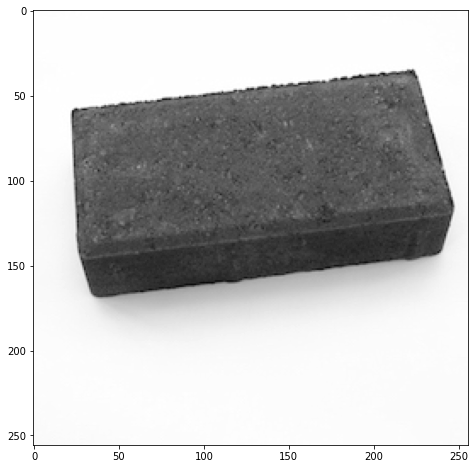

In [4]:
fig = figure(0, (8, 8))
imshow(gray, cmap = 'gray');

And, now filter our image with $K_x$ and $K_y$ seperately. We'll call our filtered images $G_x$ and $G_y$.

In [5]:
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

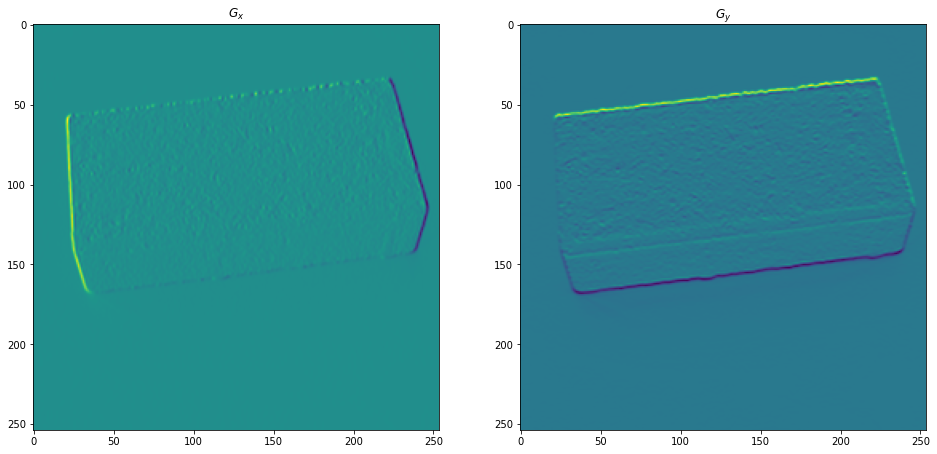

In [6]:
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(Gx)
title('$G_x$');

fig.add_subplot(1,2,2)
imshow(Gy)
title('$G_y$');

- Alright, we now have an estimate of the gradient of our images in the x and y direction!
- The next step here is reasonably simple - we would like to estimate the overall gradient for each pixel in our images.
- We can do this by taking the gradient magnitude:

$$
\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }
$$

In [8]:
#Compute Gradient Magnitude:
G = np.sqrt(Gx**2+Gy**2)

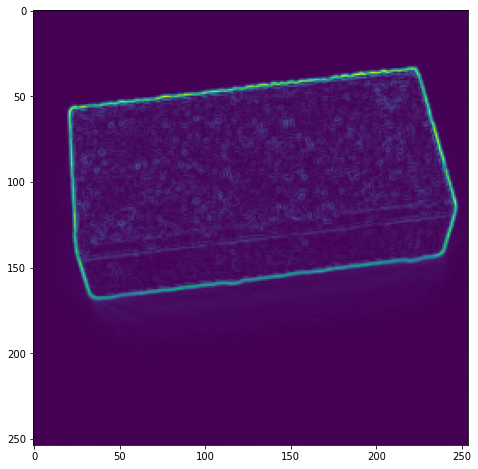

In [9]:
fig = figure(0, (8,8))
imshow(G);

In [60]:
temp=G.argmax(0)
m = mean(temp)
# print(temp>m)
item = temp>m
# print(item)
# temp1 =np.array(item.size/4,dtype =bool)
temp1 = []
from collections import Counter 
for i in range(0,item.size,5):
    
    n_num = item[i:i+5] 
    n = len(n_num) 

    data = Counter(n_num) 
#     print("data "+str(data))
    get_mode = dict(data) 
#     print("get_mode"+ str(get_mode))
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 

#     if len(mode) == n: 
#         get_mode = "No mode found"
#     else: 
# #         get_mode = "Mode is / are: " + ', '.join(map(str, mode)) 
    temp1.append(mode[0])

    
    
#     temp1.append(mode(item[i:i+5]))
#     print(item[i])
#     if item[i]==False and  item[i+1]==False and item[i+2]==False and item[i+3]==False and item[i+4]==False:
#         temp1.append(False)
#     else:
#         temp1.append(True)
print(temp1)

[True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True]


- Not bad, right? Our edges show up quite nicely!
- Let's make a quick comparison to Robert's Cross:

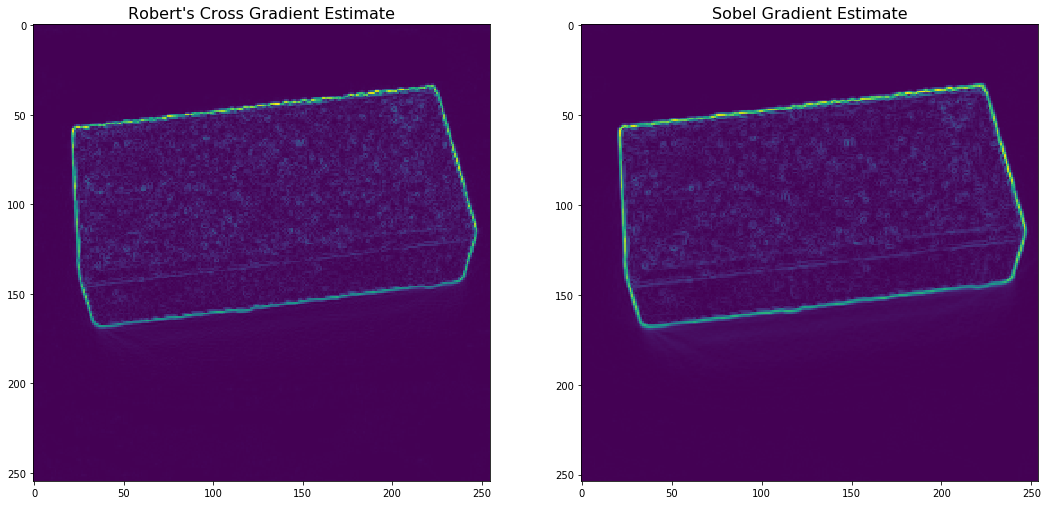

In [10]:
from util.filters import roberts_cross
fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
imshow(roberts_cross(gray))
title("Robert's Cross Gradient Estimate", fontsize=16);

fig.add_subplot(1,2,2)
imshow(G)
title('Sobel Gradient Estimate', fontsize=16);

**A few observations**
- The edges in the Sobel-Feldman operator image look more pronounced
- The edges in the Sobel-Feldman operator image look a bit cleaner
- The surface of the brick looks a little less noisy in the Sobel-Feldman operator image

![](../graphics/roberts_cross_vs_sobel-01.png)

# Why might the Sobel-Feldman Operator be **Less Noisy** than Robert's Cross?

![](../graphics/spacer_small.png)

- Because Sobel is both **averaging and differencing!** It's combining some of the moving-average noise reduction we saw last time in one direction with a differencing operator in the other.

## Let's review our issues with Robert's Cross

1. **Noisy** - Robert's Cross is quite susceptible to noise.
2. **Anisotropic** - doesn't respond as strongly to slanted edges. 
3. **Slow** as we've implemented it here.
4. **No Direction** - as we've implemented Robert's Cross here, we only learn about the **magnitude** of our esimate of the image intensity derivative, not its **direction.** 

## Sobel fixes some problems

- So, the Sobel operator has shown improved performance over Robert's Cross in a couple of key areas. 
- And there's one more improvement we can make, almost for free. 
- Let's think about the **direction of our gradient estimate** for a moment.

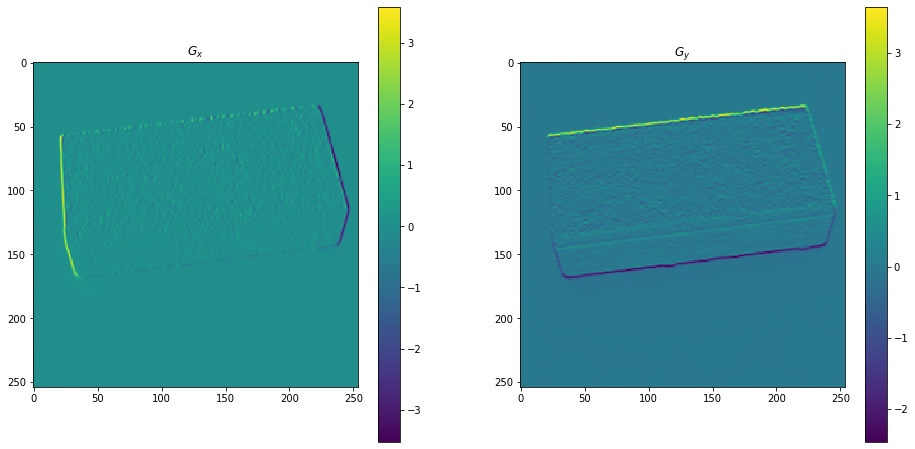

In [11]:
fig = figure(0, (16, 8))
fig.add_subplot(1,2,1)
imshow(Gx)
title('$G_x$');
colorbar()

fig.add_subplot(1,2,2)
imshow(Gy)
title('$G_y$');
colorbar();

- Thanks to the first step of the Sobel-Feldman Operator, we have estimates of the gradient of our image in the $x$ and $y$ direction for each pixel.
- One way to think about $G_x$ and $G_y$ are as the $x$ and $y$ components of vectors in 2-d space:

![](../graphics/sobel_vector_field-01.png)

Interpreting $G_x$ and $G_y$ in this way, we can compute a direction for our gradient estimate at each pixel using a little trigonometry:

![](../graphics/magnitude_and_direction-01.png)

### **Let's code it up!**

In [61]:
im = imread('../data/easy/ball/ball_2.jpg')
gray = convert_to_grayscale(im/255.) #Normalize image values to be between 0 and 1, convert to grayscale

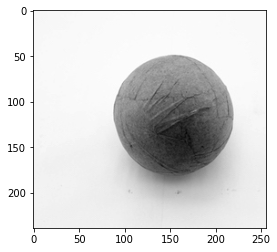

In [62]:
imshow(gray, cmap = 'gray')

In [63]:
#Compute x and y derivative estimates
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

#Compute Gradient Magnitude:
G = np.sqrt(Gx**2+Gy**2)

In [64]:
#Arctan2 works a little better here, allowing us to avoid dividing by zero:
G_direction = np.arctan2(Gy, Gx)

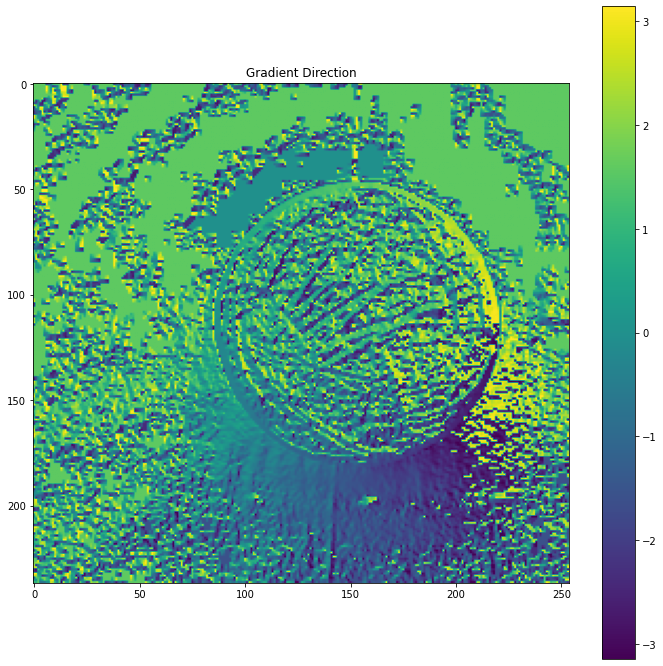

In [65]:
fig = figure(0, (12, 12))
imshow(G_direction)
colorbar();
title('Gradient Direction');

- Alright, so that's cool - but a bit noisy, right? 
- We can really start to get some nice results by **combining our magnitude and direction information.**
- One way to accomplish this is to first threshold our gradient magnitude. 
- Let's use the interact module to help:

In [1]:
from ipywidgets import interact

#Show all pixels with values above threshold:
def tune_thresh(thresh = 0):
    fig = figure(0, (8,8))
    imshow(G > thresh)

In [2]:
interact(tune_thresh, thresh = (0, 1, 0.05));

interactive(children=(FloatSlider(value=0.0, description='thresh', max=1.0, step=0.05), Output()), _dom_classe…

- After finding a good threshold, we can filter out all "edges" with values less than our threshold.

In [19]:
thresh = 0.55

edges_and_angles = np.zeros(G.shape)*np.NaN #Create empty array of NaNs
#Replace pixels with gradient estimates above thresh with the direction of the gradient estimate:
edges_and_angles[G>thresh] = G_direction[G>thresh] 

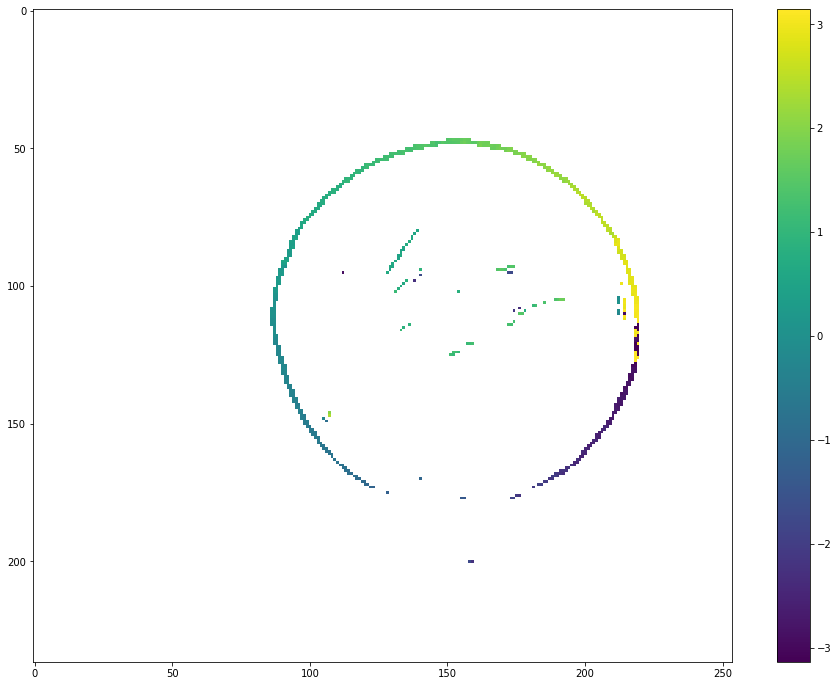

In [20]:
fig = figure(0, (16,12))
imshow(edges_and_angles)
colorbar();

- Now we're really getting somewhere!
- Let's make sure this plot makes sense. We've filtered out all pixles with gradient estimates less then our threshold, and for those pixels, we're visualizing the direction of our gradient using color.
- **Why do our color bar units go from about -3 to 3?**
- **Notice that the colors of our edges change continuously around our cirle, with one exception on the right side - why does this discontinuity happen?**


## **Putting it All Together**

---

![](../graphics/sobel_operator_summary-01.png)

---

![](../videos/edges_brick_ball_cylinder.gif)

- The Sobel-Feldman operator could be quite helpful in programming challenge for this unit!
- Now, one final point here - how are we doing with respect to our original problems with Robert's Cross? Has the Sobel-Feldman Operator been helpful?

## Problems with Robert's Cross

1. **Noisy** - Robert's Cross is quite susceptible to noise.
2. **Anisotropic** - doesn't respond as strongly to slanted edges. 
3. **Slow** as we've implemented it here.
4. **No Direction** - as we've implemented Robert's Cross here, we only learn about the **magnitude** of our esimate of the image intensity derivative, not its **direction.** 

## Progress?
- We've then that the Sobel-Feldman operator is less noisy than Robert's cross, and using the smoothing techniques from the Image Filtering Notebook, we can further reduce noise if needed.
- The Sobel-Feldman operator responds reasonably well to edges in any direction, making it more isotropic than Robert's cross (try some simple slanted edge examples to see this).
- Using the Sobel-Feldman, we've been able to estimate the direction of our gradients well. Note that although not published in Robert's orginal paper, it is possible to compute an estimate of the gradient direction using Robert's Cross as well. See the [Robert's Cross Wikipedia Article](https://en.wikipedia.org/wiki/Roberts_cross).

![](../graphics/spacer_small.png)

## Appendix A - Making black-background images

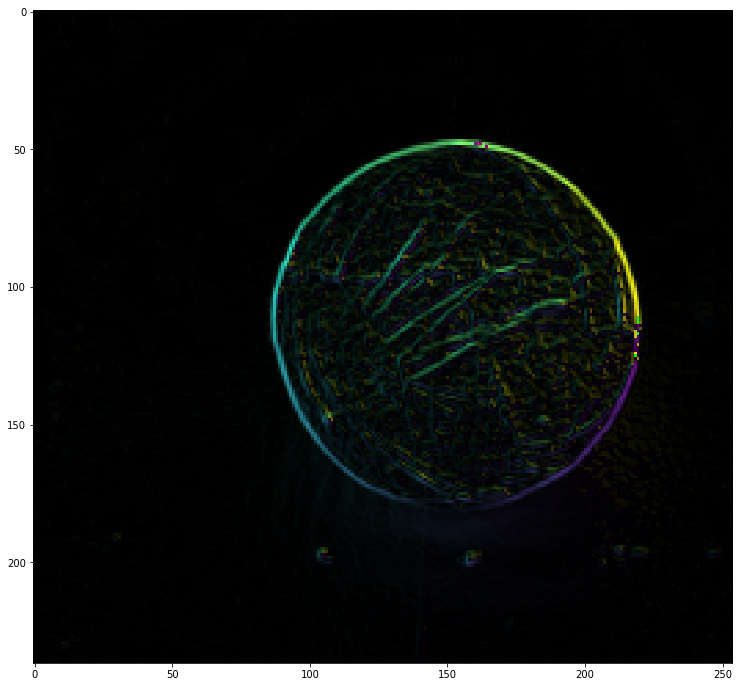

In [22]:
# We'll make a bit of a "specialty" visualization here to make the colors show up properly. 
# Don't worry if all of this code doesn't make sense.
cmap = matplotlib.cm.get_cmap('viridis')

r = (np.max(G_direction) - np.min(G_direction)) #range
direction_scaled = (G_direction - np.min(G_direction))/r

rgba = cmap(direction_scaled) 
rgb = rgba[:,:,:-1]

grad_rep = np.repeat(np.expand_dims(G, 2), 3, axis = 2)
scaled_im = np.multiply(rgb, grad_rep)

fig = figure(0, (16,12))
imshow(scaled_im)

## Appendix B - Downloading Data + Videos

In [21]:
#(Optional) Download data + videos if you don't have them.
import os, sys
sys.path.append('..')
from util.get_and_unpack import get_and_unpack

if not os.path.isdir('../data/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/data/data.zip'
    get_and_unpack(url, location='..')
    
if not os.path.isdir('../videos/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/videos.zip'
    get_and_unpack(url, location='..') 